In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from casadi import *
import scipy.io as sio
import pandas as pd
import pickle

import sys
sys.path.append('../../code/')

In [2]:
%matplotlib notebook

![title](mass_spring_system.png)

# Load Data
## MHE Results:

In [3]:
with open('mhe_results.pkl','rb') as f:
    mhe_res = pickle.load(f)
print(mhe_res.keys())
print(len(mhe_res['x']))

['x', 'u', 'u_meas', 'y', 'y_meas', 'p_est', 't']
535


Get states and inputs. Some notes:
- Structure for indexing: ```mhe_res['x', at time k, name of state```. This returns a list with one item per timestep. For convenience we concatenate the list to an array.
- The states (x) have one more element than the inputs.


In [4]:
t_mhe = mhe_res['t'].full().flatten()
print('t_mhe.shape = {}'.format(t_mhe.shape))
x_mhe = horzcat(*mhe_res['x',:-1,'LTI_x']).T.full()
print('x_mhe.shape = {}'.format(x_mhe.shape))
u_mhe = horzcat(*mhe_res['u',:]).T.full()
print('u_mhe.shape = {}'.format(u_mhe.shape))
u_meas = horzcat(*mhe_res['u_meas',:]).T.full()
print('u_meas.shape = {}'.format(u_meas.shape))
p_mhe =horzcat(*mhe_res['p_est',:]).T.full()
print('p_mhe.shape = {}'.format(p_mhe.shape))
y_mhe = horzcat(*mhe_res['y',:]).T.full()
print('y_mhe.shape = {}'.format(y_mhe.shape))
y_meas = horzcat(*mhe_res['y_meas',:]).T.full()
print('y_meas.shape = {}'.format(y_meas.shape))

t_mhe.shape = (534,)
x_mhe.shape = (534, 8)
u_mhe.shape = (534, 2)
u_meas.shape = (534, 2)
p_mhe.shape = (534, 2)
y_mhe.shape = (534, 3)
y_meas.shape = (534, 3)


## Reference

In [5]:
dataset = '../../data/LTI_sys_triple_mass_pendulum/001_LTI_results.mat'
sim_data = sio.loadmat(dataset)

t_ref = sim_data['t'].flatten()
print('t_ref.shape = {}'.format(t_ref.shape))
x_ref = sim_data['x'].T
print('x_ref.shape = {}'.format(x_ref.shape))
u_ref = sim_data['u'].T
print('u_ref.shape = {}'.format(u_ref.shape))

t_ref.shape = (534,)
x_ref.shape = (534, 8)
u_ref.shape = (534, 2)


# Plot Results

<IPython.core.display.Javascript object>


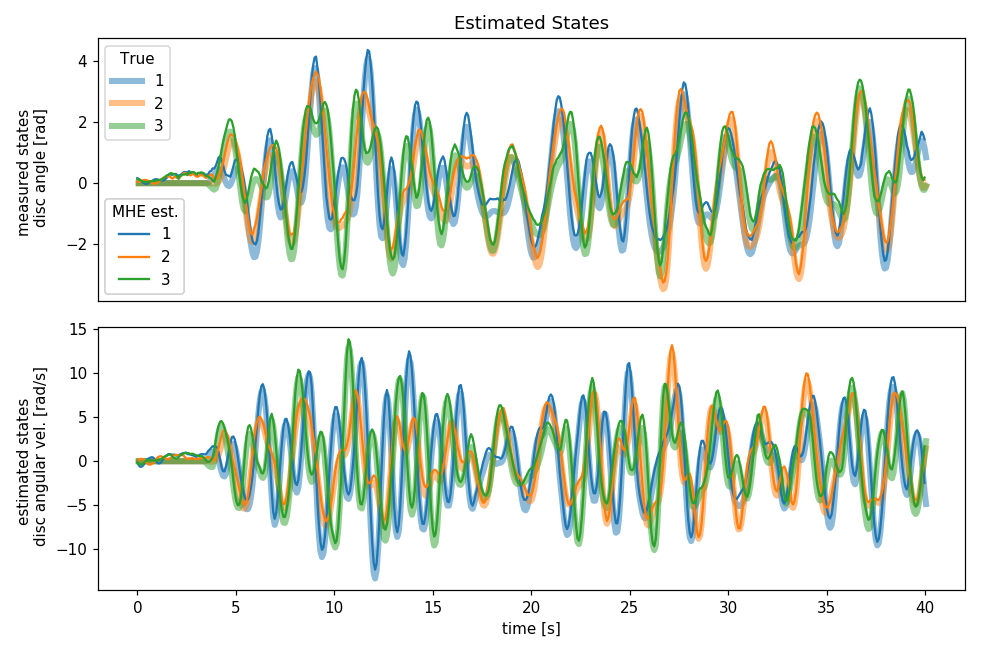

In [6]:
fig, ax = plt.subplots(2,1,figsize=(9,6), sharex=True)

lines= ax[0].plot(t_ref, x_ref[:,:3], linewidth=4, alpha=0.5)
plt.sca(ax[0])
ax[0].add_artist(plt.legend(lines, '123', title='True', loc=2))
ax[0].set_prop_cycle(None)
lines = ax[0].plot(t_mhe, x_mhe[:,0:3], label='MHE estimate')
plt.sca(ax[0])
ax[0].add_artist(plt.legend(lines, '123', title='MHE est.', loc=3))
ax[0].set_ylabel('measured states \n disc angle [rad]')
ax[0].get_xaxis().set_visible(False)
ax[0].set_title('Estimated States')

ax[1].plot(t_ref, x_ref[:,3:6], linewidth=4, alpha=0.5)
ax[1].set_prop_cycle(None)
ax[1].plot(t_mhe, x_mhe[:,3:6])
ax[1].set_ylabel('estimated states \n disc angular vel. [rad/s]')
ax[1].set_xlabel('time [s]')

fig.align_labels()
fig.tight_layout()


<IPython.core.display.Javascript object>


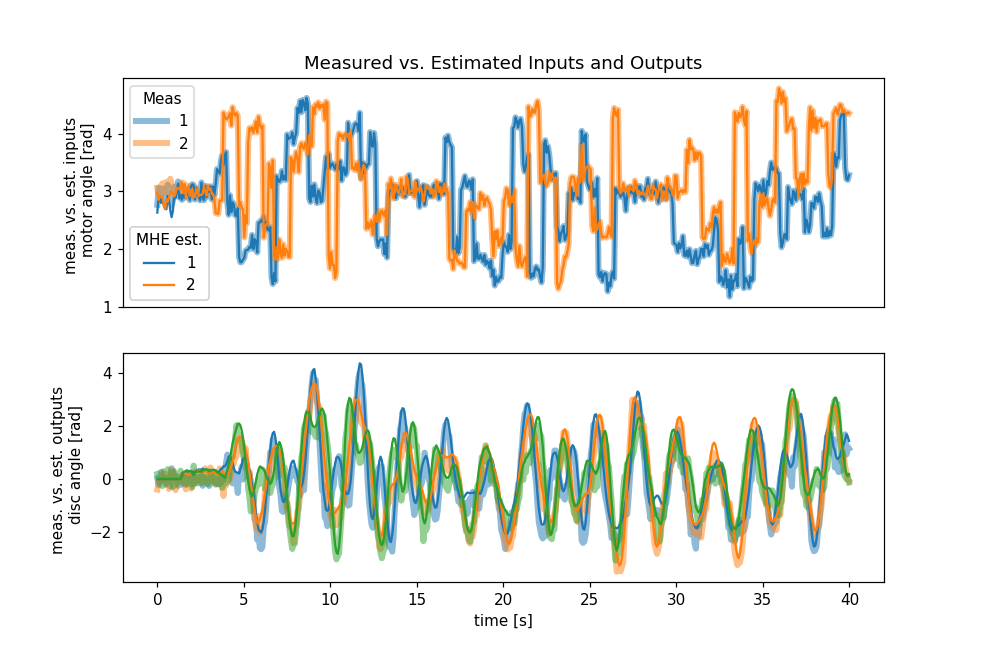

In [7]:
fig_1, ax_1 = plt.subplots(2,1,figsize=(9,6), sharex=True)

lines= ax_1[0].plot(t_mhe, u_meas, linewidth=4, alpha=0.5)
plt.sca(ax_1[0])
ax_1[0].add_artist(plt.legend(lines, '12', title='Meas', loc=2))
ax_1[0].set_prop_cycle(None)
lines = ax_1[0].plot(t_mhe, u_mhe, label='MHE estimate')
plt.sca(ax_1[0])
ax_1[0].add_artist(plt.legend(lines, '12', title='MHE est.', loc=3))
ax_1[0].set_ylabel('meas. vs. est. inputs \n motor angle [rad]')
ax_1[0].get_xaxis().set_visible(False)

ax_1[0].set_title('Measured vs. Estimated Inputs and Outputs')

ax_1[1].plot(t_mhe, y_meas, linewidth=4, alpha=0.5)
ax_1[1].set_prop_cycle(None)
ax_1[1].plot(t_mhe, y_mhe)
ax_1[1].set_ylabel('meas. vs. est. outputs \n disc angle [rad]')
ax_1[1].set_xlabel('time [s]')

fig.align_labels()
fig.tight_layout()

<IPython.core.display.Javascript object>


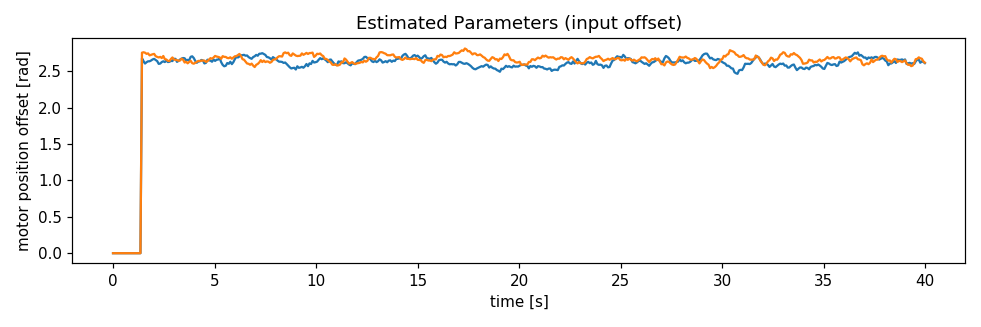

In [14]:
fig_2, ax_2 = plt.subplots(figsize=(9,3), sharex=True)

ax_2.set_title('Estimated Parameters (input offset)')
ax_2.plot(t_mhe,p_mhe)
ax_2.set_xlabel('time [s]')
ax_2.set_ylabel('motor position offset [rad]')
fig_2.tight_layout()